In [ ]:
# Loading and Exploring The Data

In [6]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/sample_data/customer_churn_dataset-training-master.csv')
test_df = pd.read_csv('/content/sample_data/customer_churn_dataset-testing-master.csv')

print(f"\nTraining data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")
print("\nTraining data columns:", train_df.columns.tolist())
print("\nFirst 5 rows of training data:")
display(train_df.head())


Training data shape: (440833, 12)
Testing data shape: (64374, 12)

Training data columns: ['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']

First 5 rows of training data:


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [10]:
print("Data Types:")
print(train_df.dtypes)

Data Types:
CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object


In [11]:
print("\nMissing Values:")
print(train_df.isnull().sum())


Missing Values:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [12]:
print("\n Summary Statistics for Numerical Features: ")
print(train_df.describe())


 Summary Statistics for Numerical Features: 
          CustomerID            Age         Tenure  Usage Frequency  \
count  440832.000000  440832.000000  440832.000000    440832.000000   
mean   225398.667955      39.373153      31.256336        15.807494   
std    129531.918550      12.442369      17.255727         8.586242   
min         2.000000      18.000000       1.000000         1.000000   
25%    113621.750000      29.000000      16.000000         9.000000   
50%    226125.500000      39.000000      32.000000        16.000000   
75%    337739.250000      48.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  440832.000000  440832.000000  440832.000000     440832.000000   
mean        3.604437      12.965722     631.616223         14.480868   
std         3.070218       8.258063     240.803001          8.596208   
min         0.000000      

In [ ]:
# Visualization

No Churn: 190833 (43.29%)
Churn: 249999 (56.71%)


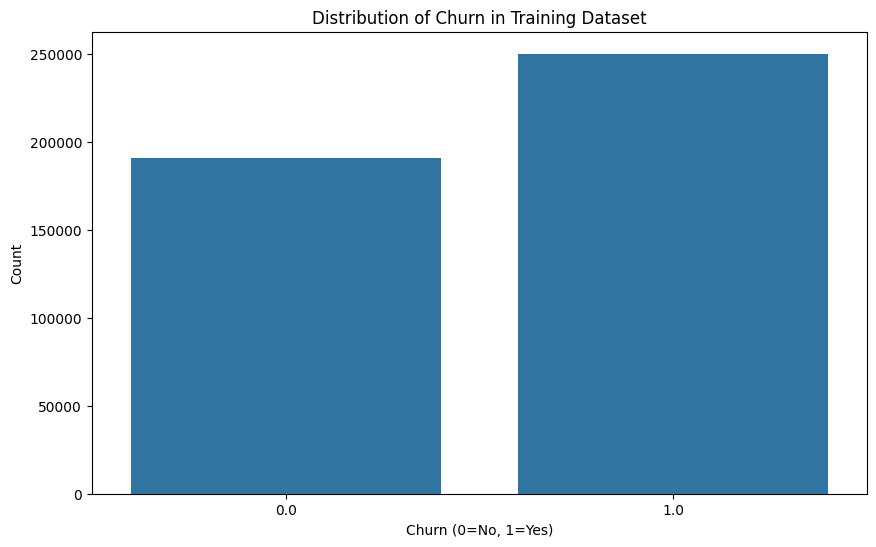

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Churn in Training Dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Churn')
plt.title('Distribution of Churn in Training Dataset')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')

churn_count = train_df['Churn'].value_counts()
print(f"No Churn: {churn_count[0]} ({churn_count[0]/len(train_df)*100:.2f}%)")
print(f"Churn: {churn_count[1]} ({churn_count[1]/len(train_df)*100:.2f}%)")
plt.show()

categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

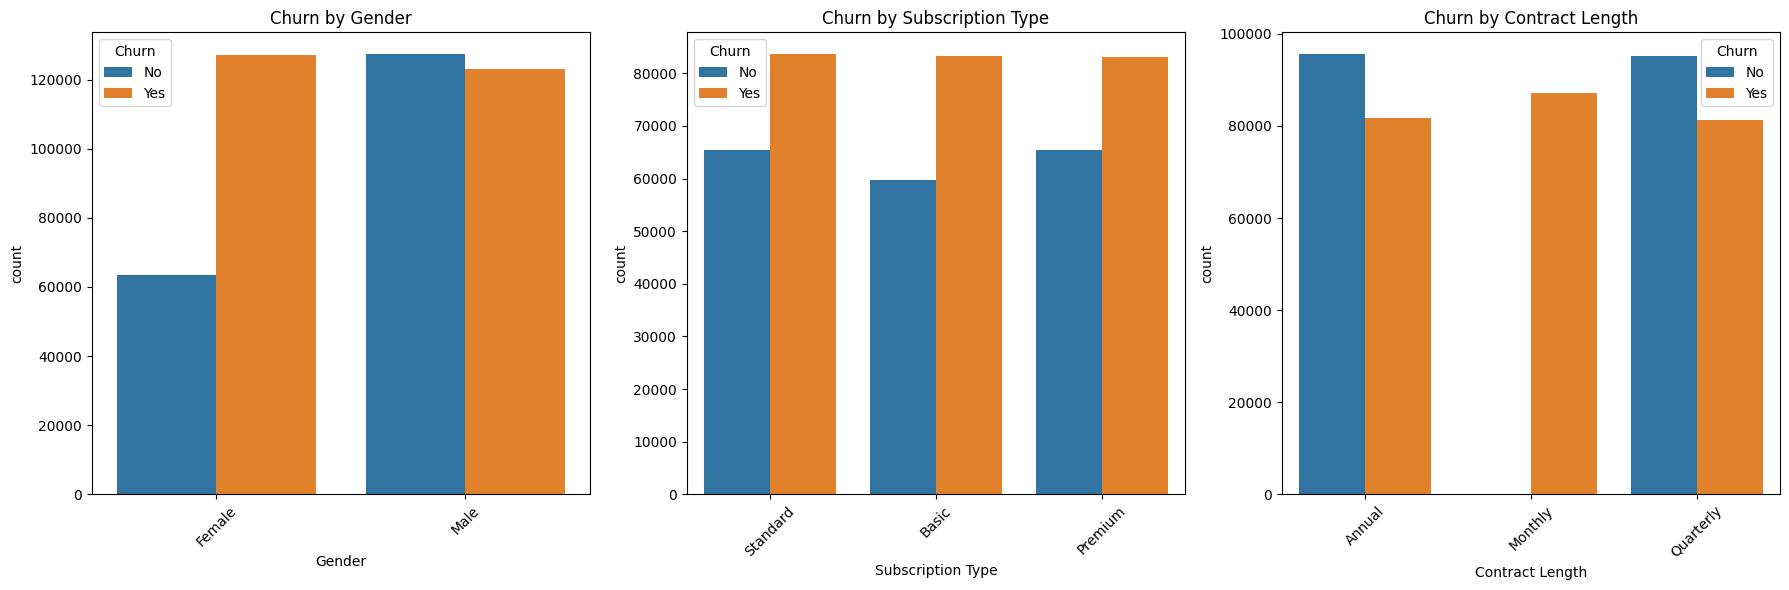

In [14]:
# Analyzing Categorical Features
plt.figure(figsize=(18, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=train_df, x=feature, hue='Churn')
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

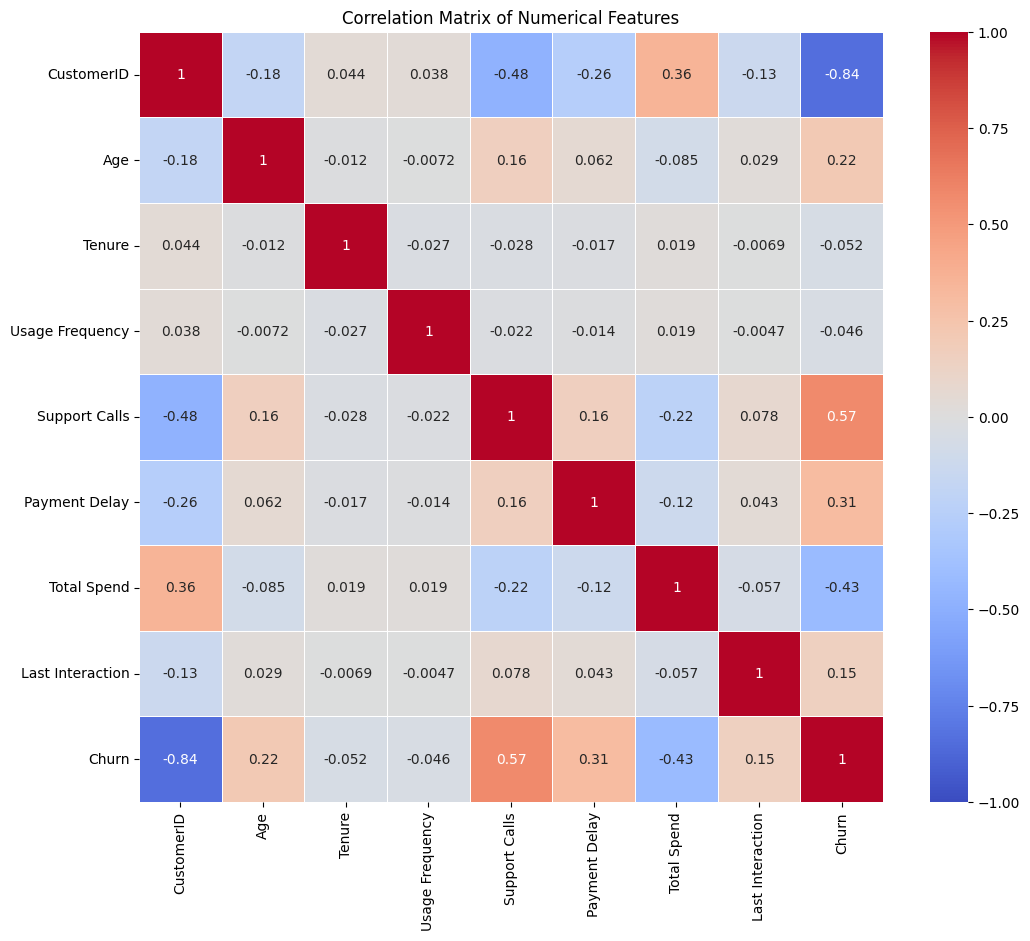

In [15]:
# Correlation Matrix of Numerical Features
plt.figure(figsize=(12, 10))
correlation = train_df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
                      'Payment Delay', 'Total Spend', 'Last Interaction']

In [16]:
# Key Insights Summary
skewness = train_df[numerical_features].skew().sort_values(ascending=False)

print("=== KEY INSIGHTS ===")
print("\n1. Churn Distribution:")
churn_counts = train_df['Churn'].value_counts()
churn_percentage = train_df['Churn'].value_counts(normalize=True) * 100
for i, (count, percentage) in enumerate(zip(churn_counts, churn_percentage)):
    print(f"  Churn {i}: {count} customers ({percentage:.1f}%)")

print("\n2. Top Correlations with Churn:")
churn_corr = correlation['Churn'].abs().sort_values(ascending=False)
for feature, corr in churn_corr.head(5).items():
    direction = "+" if correlation['Churn'][feature] > 0 else "-"
    if feature != 'Churn':
        print(f"  {feature}: {direction}{abs(corr):.3f}")

print("\n3. Top Features Requiring Log Transformation (Highest Skewness):")
for feature, skew_val in skewness.head(3).items():
    print(f"  {feature}: {skew_val:.3f}")

print("\n4. Churn Rate by Contract Length:")
for category, rate in train_df.groupby('Contract Length')['Churn'].mean().sort_values(ascending=False).items():
    print(f"  {category}: {rate*100:.1f}%")

=== KEY INSIGHTS ===

1. Churn Distribution:
  Churn 0: 249999 customers (56.7%)
  Churn 1: 190833 customers (43.3%)

2. Top Correlations with Churn:
  CustomerID: -0.839
  Support Calls: +0.574
  Total Spend: -0.429
  Payment Delay: +0.312

3. Top Features Requiring Log Transformation (Highest Skewness):
  Support Calls: 0.667
  Payment Delay: 0.267
  Last Interaction: 0.177

4. Churn Rate by Contract Length:
  Monthly: 100.0%
  Annual: 46.1%
  Quarterly: 46.0%


In [17]:
# Basic Data Preprocessing

In [18]:
train_processed = train_df.copy()
test_processed = test_df.copy()

print("Missing values in training data:")
print(train_processed.isnull().sum().sum())

train_processed = train_processed.drop_duplicates()
test_processed = test_processed.drop_duplicates()

Missing values in training data:
12


In [19]:
# Label Encoding for Categorical Features

In [20]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    le.fit(train_processed[feature])

    train_processed[feature + '_encoded'] = le.transform(train_processed[feature])
    test_processed[feature + '_encoded'] = le.transform(test_processed[feature])

    label_encoders[feature] = le

    print(f"Label encoding for {feature}:")
    for i, category in enumerate(le.classes_):
        print(f"  {category} -> {i}")

encoded_cols = ['Gender', 'Gender_encoded', 'Subscription Type', 'Subscription Type_encoded',
                'Contract Length', 'Contract Length_encoded']
train_processed[encoded_cols].head()

Label encoding for Gender:
  Female -> 0
  Male -> 1
  nan -> 2
Label encoding for Subscription Type:
  Basic -> 0
  Premium -> 1
  Standard -> 2
  nan -> 3
Label encoding for Contract Length:
  Annual -> 0
  Monthly -> 1
  Quarterly -> 2
  nan -> 3


,Gender,Gender_encoded,Subscription Type,Subscription Type_encoded,Contract Length,Contract Length_encoded
0,Female,0,Standard,2,Annual,0
1,Female,0,Basic,0,Monthly,1
2,Female,0,Basic,0,Quarterly,2
3,Male,1,Standard,2,Monthly,1
4,Male,1,Basic,0,Monthly,1


In [21]:
# Feature Engineering: Create Time-Based Features

In [22]:
# Time-based features

train_processed['Tenure_Age_Ratio'] = train_processed['Tenure'] / train_processed['Age']
test_processed['Tenure_Age_Ratio'] = test_processed['Tenure'] / test_processed['Age']

contract_to_months = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
train_processed['Contract_Months'] = train_processed['Contract Length'].map(contract_to_months)
test_processed['Contract_Months'] = test_processed['Contract Length'].map(contract_to_months)

train_processed['Monthly_Spend'] = train_processed['Total Spend'] / (train_processed['Contract_Months'] * train_processed['Tenure'])
test_processed['Monthly_Spend'] = test_processed['Total Spend'] / (test_processed['Contract_Months'] * test_processed['Tenure'])

train_processed['Relative_Inactivity'] = train_processed['Last Interaction'] / train_processed['Tenure']
test_processed['Relative_Inactivity'] = test_processed['Last Interaction'] / test_processed['Tenure']

train_processed['Support_Calls_Per_Month'] = train_processed['Support Calls'] / train_processed['Tenure']
test_processed['Support_Calls_Per_Month'] = test_processed['Support Calls'] / test_processed['Tenure']

train_processed['Usage_Per_Month'] = train_processed['Usage Frequency'] / train_processed['Tenure']
test_processed['Usage_Per_Month'] = test_processed['Usage Frequency'] / test_processed['Tenure']

train_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
test_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
train_processed.fillna(0, inplace=True)
test_processed.fillna(0, inplace=True)

In [23]:
# Feature Transformation: Apply Log Transformation to Skewed Features

In [24]:
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
                     'Total Spend', 'Last Interaction', 'Tenure_Age_Ratio', 'Monthly_Spend',
                     'Relative_Inactivity', 'Support_Calls_Per_Month', 'Usage_Per_Month']

skewness = train_processed[numerical_features].skew().sort_values(ascending=False)
print("Feature skewness:")
print(skewness)

features_to_transform = skewness[abs(skewness) > 0.5].index.tolist()
print("\nFeatures selected for log transformation:")
print(features_to_transform)

Feature skewness:
Monthly_Spend              10.375240
Support_Calls_Per_Month     7.692146
Relative_Inactivity         6.687097
Usage_Per_Month             6.505014
Tenure_Age_Ratio            0.917983
Support Calls               0.666810
Payment Delay               0.267407
Last Interaction            0.176773
Age                         0.161960
Usage Frequency            -0.043475
Tenure                     -0.061402
Total Spend                -0.457187
dtype: float64

Features selected for log transformation:
['Monthly_Spend', 'Support_Calls_Per_Month', 'Relative_Inactivity', 'Usage_Per_Month', 'Tenure_Age_Ratio', 'Support Calls']
